In [176]:
from scipy import stats 

population = stats.norm.rvs(loc=2, scale=5, size=100000) 

In [177]:
import numpy as np  

sample_size = 100 

sample = np.random.choice(a = population, size = sample_size) 

In [178]:
sample_mean = sample.mean() 

st_dev = population.std() 

In [179]:
z_value = stats.norm.ppf(q = 0.975) 

print('z-value:right', z_value) 


z-value:right 1.959963984540054


In [180]:
z_value = stats.norm.ppf(q = 0.025) 

print("z-value:left", z_value) 

z-value:left -1.9599639845400545


In [181]:
interval = z_value * (st_dev/np.sqrt(sample_size)) 

conf_inv = (sample_mean - interval, sample_mean + interval) 

print("Confidence interval:", conf_inv) 

Confidence interval: (3.2252005398565275, 1.2716410271628984)


In [182]:
def compute_ci(sample, st_dev): 

    z_value = stats.norm.ppf(q = 0.975) 

    sample_size = len(sample) 

    interval = z_value * (st_dev/np.sqrt(sample_size)) 

    conf_inv = (sample_mean - interval, sample_mean + interval) 

    return conf_inv 

In [183]:
np.random.seed(5)  

sample_size = 2000 

sample = np.random.choice(a = population, size = sample_size)  

ci = compute_ci(sample, st_dev) 

print("conf interval for 2000 sample size:", ci) 

conf interval for 2000 sample size: (2.030006190085997, 2.466835376933429)


In [184]:
def compute_ci_t(sample, alpha=0.95): 

    n = sample.shape[0] 

    mu, se = np.mean(sample), stats.sem(sample)  

    bound = se * stats.t.ppf((1 + alpha) / 2., n-1) 

    return mu - bound, mu + bound 

sample = np.random.choice(a = population, size = 30) 

ci_t = compute_ci_t(sample, alpha=0.95) 

print("conf interval with t test for 2000 sample size:", ci_t) 

conf interval with t test for 2000 sample size: (0.7472781006990972, 4.933961890190334)


In [185]:
import pandas as pd  

import numpy as np 

taxi_mex = pd.read_csv('taxi-route/mex_clean.csv') 

 

def generate_distribution_sample(data, sample_size, dist_size):  

    sample_means = [] 

    for i in range(dist_size): 

        sample = np.random.choice(a = data, size = sample_size)  

        sample_means.append(np.mean(sample)) 

    return sample_means
 
sample_size = 10000 

dist_size = 50000 

sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000, sample_size, dist_size) 
 

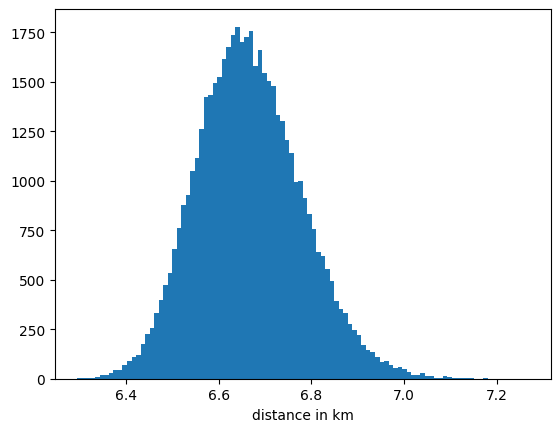

In [186]:
import matplotlib.pyplot as plt  

plt.hist(sample_means, bins=100)  

plt.xlabel('distance in km')  

plt.show() 

In [187]:
np.sort(sample_means) 

lb = np.percentile(sample_means, 2.5) 

ub = np.percentile(sample_means, 97.5) 

print("conf interval for bootstrap:", (lb, ub)) 

conf interval for bootstrap: (6.461480464999999, 6.9035547875)
